In [1]:
# -*- coding:utf-8 -*-
   
# 购物篮词云分析
# 对数据集进行词云可视化展示，可视化探索（Top10的商品有哪些）
 
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import collections
import numpy as np
from nltk.tokenize import word_tokenize


In [7]:

#生成词云及前十商品柱状图


def wordCloud(productList,topN):

    wordList = " ".join(productList)
    cut_text = word_tokenize(wordList)

    # print(cut_text) #太长不print了

    cut_text_join = " ".join(cut_text)
    wc = WordCloud( max_words=100, width=4000, height=2400, collocations= False )
    wordcloud = wc.generate(cut_text_join)

 
    print('======= 词云done =======')

    #写词云图片
    wordcloud.to_file('wc.jpg')

    #计算销量前10的商品
    word_count = WordCloud.process_text(wc,cut_text_join)
    word_count_sort = pd.DataFrame(sorted(word_count.items(),key=lambda e:e[1],reverse=True))[:topN]
    print('====== topN商品done =======')
    print(word_count_sort)

    #使用subplot同时显示词云图及柱状图
    print('======= 画图中 =======')

    fig = plt.figure(figsize = (18, 14))

    plt.subplot(211)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.subplot(212)

    plt.bar(word_count_sort[0], word_count_sort[1])
    plt.xlabel("product", fontsize = 12)
    plt.ylabel("count", fontsize = 12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)


    plt.title("Top 10 Product", fontsize = 15)

    plt.show()

    


数据预处理done
======= 词云done =======
====== topN商品done =======
                   0     1
0      mineral_water  1788
1               eggs  1348
2          spaghetti  1306
3       french_fries  1282
4          chocolate  1230
5          green_tea   991
6               milk   972
7        ground_beef   737
8  frozen_vegetables   715
9           pancakes   713
======= 画图中 =======


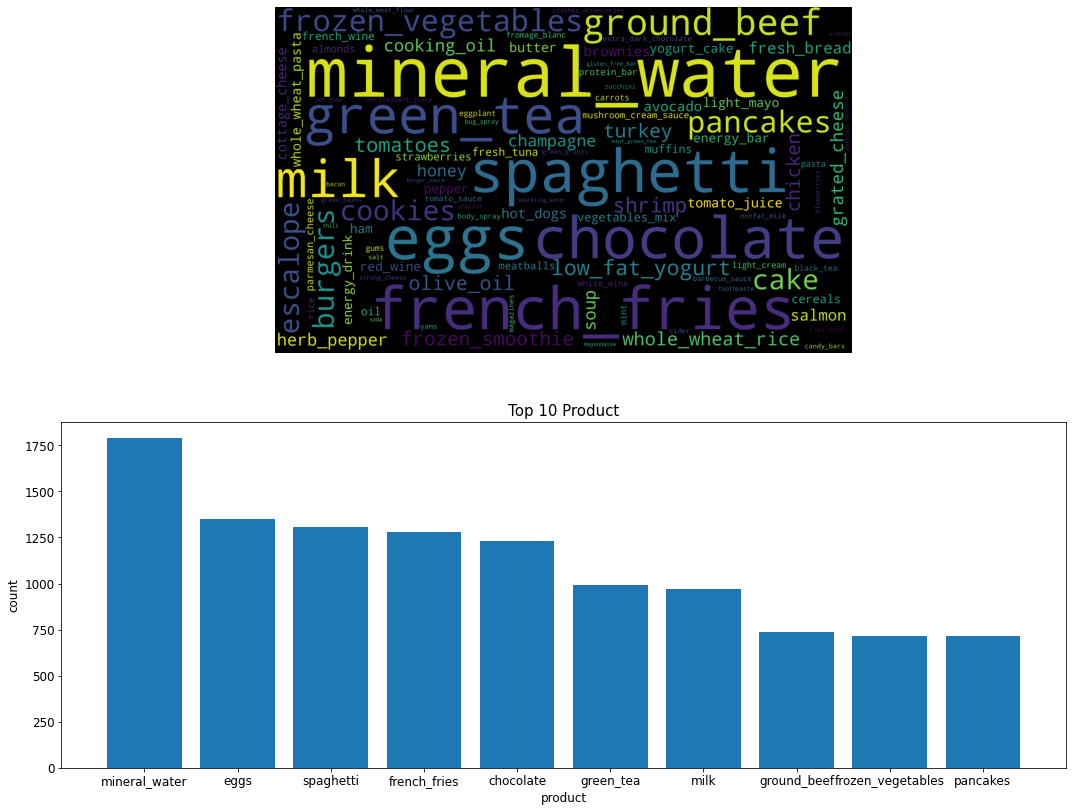

In [8]:
#数据加载
df = pd.read_csv('./Market_Basket_Optimisation.csv', header = None) #没有表头

#把df中的商品放到list里
productList = []

for i in range(len(df)):
    p = list(df.loc[i,:])
    productList = productList + p

#商品名含空格用下划线替代并删除NaN
productList = [item.replace(" & ","_")  for item in productList if item == item] 
productList = [item.replace(" ","_")  for item in productList if item == item] 
print('数据预处理done')

#生成词云并画前十柱状图
wordCloud(productList,10)
